In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('202501.xlsx')

In [5]:
# 금속 농도 열 선택 (단위 ng/m3 포함된 열만)
metal_columns = [col for col in df.columns if '(ng/m3)' in col]

# 날짜 추출
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])
df['Date'] = df['Pump-Begin'].dt.date

In [7]:
# 금속 농도값 전처리: NaN, 0, 음수 제거
for col in metal_columns:
    df[col] = df[col].apply(lambda x: x if pd.notna(x) and x > 0 else pd.NA)

In [9]:
# 날짜별 금속 농도 합계 계산
daily_metal_sum = df.groupby('Date')[metal_columns].sum()

In [10]:
# 날짜별 총 농도 계산 및 이상치 판정 (평균보다 1.5배 이상인 경우)
total_sum = daily_metal_sum.sum(axis=1)
threshold = total_sum.mean() + 1.5 * total_sum.std()
outlier_dates = total_sum[total_sum > threshold].index

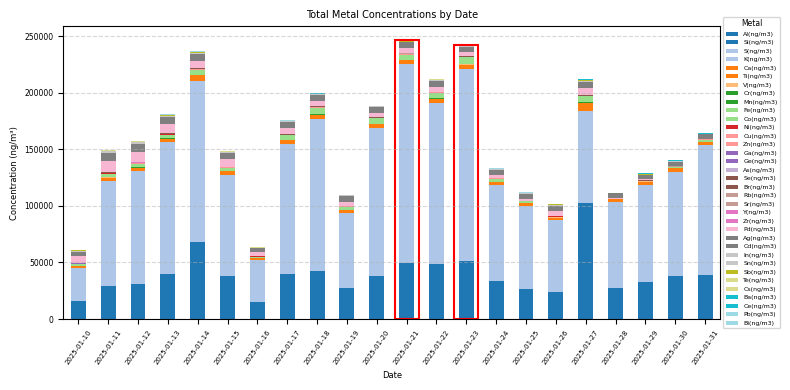

In [27]:
# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 4))
daily_metal_sum.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# 이상치 날짜 표시
for idx, date in enumerate(daily_metal_sum.index):
    if date in outlier_dates:
        ax.add_patch(plt.Rectangle((idx - 0.4, 0),
                                   width=0.8,
                                   height=total_sum[date],
                                   fill=False, edgecolor='red', linewidth=1.5))

# 그래프 기본 설정
ax.set_title('Total Metal Concentrations by Date', fontsize=7)
ax.set_xlabel('Date', fontsize=6)
ax.set_ylabel('Concentration (ng/m³)', fontsize=6)
plt.setp(ax.get_xticklabels(),rotation=55, fontsize=5.0)
plt.setp(ax.get_yticklabels(), fontsize=5.5)
ax.grid(axis='y', linestyle='--', alpha=0.5)


# 범례 설정
ax.legend(loc='center left',
           bbox_to_anchor=(1.0, 0.5),
           fontsize=4.5,
           title='Metal',
           title_fontsize=5.5)

# 레이아웃 자동 조절
plt.tight_layout()

# 결과 출력
plt.show()